In [1]:
%matplotlib notebook

In [24]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random
import seaborn as sns

In [25]:
euro = "data/Euro_6_latest.csv"
euro_df = pd.read_csv(euro, encoding='ANSI')
euro_df.head()

,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),Electric energy consumption Miles/kWh,wh/km,Maximum range (Km),Maximum range (Miles),Euro Standard,Diesel VED Supplement,Testing Scheme,WLTP Imperial Low,WLTP Imperial Medium,WLTP Imperial High,WLTP Imperial Extra High,WLTP Imperial Combined,WLTP Imperial Combined (Weighted),WLTP Metric Low,WLTP Metric Medium,WLTP Metric High,WLTP Metric Extra High,WLTP Metric Combined,WLTP Metric Combined (Weighted),WLTP CO2,WLTP CO2 Weighted,Equivalent All Electric Range Miles,Equivalent All Electric Range KM,Electric Range City Miles,Electric Range City Km,Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Unnamed: 44
0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,0.0,NaN,NaN,NaN,Euro 6d,False,WLTP,29.1,43.5,46.3,38.2,39.8,0.0,9.7,6.5,6.1,7.4,7.1,0.0,161.0,0.0,NaN,NaN,NaN,NaN,829.0,39.0,20.0,NaN,NaN,NaN,NaN,74.0,09 February 2022,NaN
1,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,0.0,NaN,NaN,NaN,Euro 6d,False,WLTP,29.7,46.3,48.7,40.4,41.5,0.0,9.5,6.1,5.8,7.0,6.8,0.0,153.0,0.0,NaN,NaN,NaN,NaN,829.0,39.0,20.0,NaN,NaN,NaN,NaN,74.0,09 February 2022,NaN
2,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,0.0,NaN,NaN,NaN,Euro 6d-TEMP,False,WLTP,27.2,42.8,43.4,34.4,37.2,0.0,10.4,6.6,6.5,8.2,7.6,0.0,169.0,0.0,NaN,NaN,NaN,NaN,760.0,52.0,27.0,NaN,NaN,NaN,NaN,73.5,05 October 2020,NaN
3,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,0.0,NaN,NaN,NaN,Euro 6d-TEMP,False,WLTP,27.4,42.2,47.1,38.7,39.2,0.0,10.3,6.7,6.0,7.3,7.2,0.0,162.0,0.0,NaN,NaN,NaN,NaN,760.0,52.0,27.0,NaN,NaN,NaN,NaN,73.5,05 October 2020,NaN
4,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,0.0,NaN,NaN,NaN,Euro 6d-TEMP,False,WLTP,27.2,42.8,43.5,34.4,37.2,0.0,10.4,6.6,6.5,8.2,7.6,0.0,169.0,0.0,NaN,NaN,NaN,NaN,760.0,52.0,27.0,NaN,NaN,NaN,NaN,73.5,02 July 2021,NaN


In [26]:
# show all columns
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)


In [27]:
emission_date = euro_df.loc[:, ['Powertrain','Emissions CO [mg/km]','Date of change']]
emission_date["Date of change"] = pd.to_datetime(emission_date["Date of change"]).dt.strftime('%Y')
emission_date.head()
#emission_date.dtypes


,Powertrain,Emissions CO [mg/km],Date of change
0,Internal Combustion Engine (ICE),829.0,2022
1,Internal Combustion Engine (ICE),829.0,2022
2,Internal Combustion Engine (ICE),760.0,2020
3,Internal Combustion Engine (ICE),760.0,2020
4,Internal Combustion Engine (ICE),760.0,2021


In [28]:
emission_rename = emission_date.rename(columns={"Emissions CO [mg/km]": "Emissions", "Date of change": "Year"})
emission_rename.head()

,Powertrain,Emissions,Year
0,Internal Combustion Engine (ICE),829.0,2022
1,Internal Combustion Engine (ICE),829.0,2022
2,Internal Combustion Engine (ICE),760.0,2020
3,Internal Combustion Engine (ICE),760.0,2020
4,Internal Combustion Engine (ICE),760.0,2021


In [40]:
emission_groupby = emission_rename.groupby(['Year', 'Powertrain'], as_index=False)
emission_summary = emission_groupby.mean()
emission_summary

,Year,Powertrain,Emissions
0,2019,Hybrid Electric Vehicle (HEV),160.000000
1,2019,Internal Combustion Engine (ICE),213.685950
2,2020,Battery Electric Vehicle (BEV) / Pure Electric...,0.000000
3,2020,Hybrid Electric Vehicle (HEV),169.828947
4,2020,Internal Combustion Engine (ICE),229.919355
5,2020,Plug-in Hybrid Electric Vehicle (PHEV),381.540541
6,2021,Battery Electric Vehicle (BEV) / Pure Electric...,0.000000
7,2021,Hybrid Electric Vehicle (HEV),171.233333
8,2021,Internal Combustion Engine (ICE),153.566593
9,2021,Mild Hybrid Electric Vehicle (MHEV),245.958065


<IPython.core.display.Javascript object>


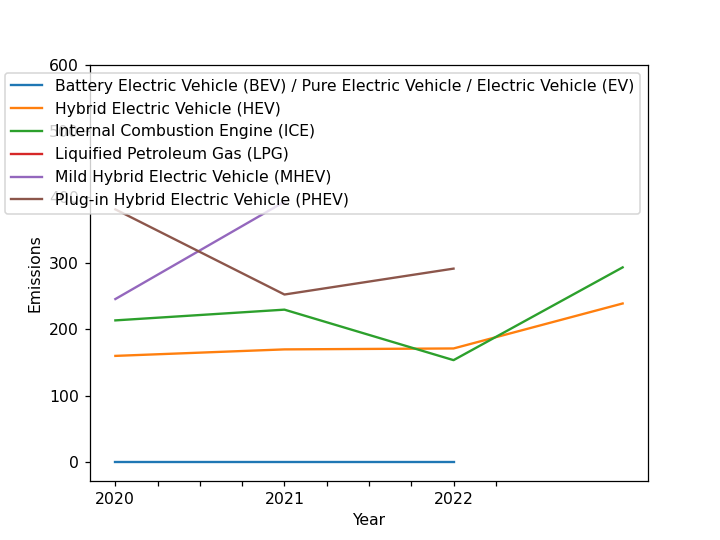

Powertrain
Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)    AxesSubplot(0.125,0.11;0.775x0.77)
Hybrid Electric Vehicle (HEV)                                                     AxesSubplot(0.125,0.11;0.775x0.77)
Internal Combustion Engine (ICE)                                                  AxesSubplot(0.125,0.11;0.775x0.77)
Liquified Petroleum Gas (LPG)                                                     AxesSubplot(0.125,0.11;0.775x0.77)
Mild Hybrid Electric Vehicle (MHEV)                                               AxesSubplot(0.125,0.11;0.775x0.77)
Plug-in Hybrid Electric Vehicle (PHEV)                                            AxesSubplot(0.125,0.11;0.775x0.77)
Name: Emissions, dtype: object

In [41]:
emission_summary.set_index("Year", inplace=True)
emission_summary.groupby("Powertrain")["Emissions"].plot(legend=True, xlabel="Year", ylabel="Emissions")